In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
import matplotlib.pyplot as plt

In [2]:
mean_null = 0.
std_null = 1.
mean_hypo = 1.
std_hypo = 1.

In [3]:
def cumulative_normal(d, mu, sigma):
    return 0.5*(1 + erf((d-mu)/(np.sqrt(2)*sigma)))

In [4]:
def calc_p_value(d_obs):
    return 1-cumulative_normal(d_obs, mean_null, std_null)

In [5]:
results = []
for i in range(100000):
    null_is_true = np.random.choice([True, False])
    true_mean = mean_null if null_is_true else mean_hypo
    obs_datum = np.random.randn() + true_mean
    p_value = calc_p_value(obs_datum)
    if p_value < 0.05:
        null_test = False
    else:
        null_test = True
    results.append({"real": null_is_true, "reported": null_test, "p-value": p_value})

In [6]:
import pandas as pd
result_df = pd.DataFrame(results)

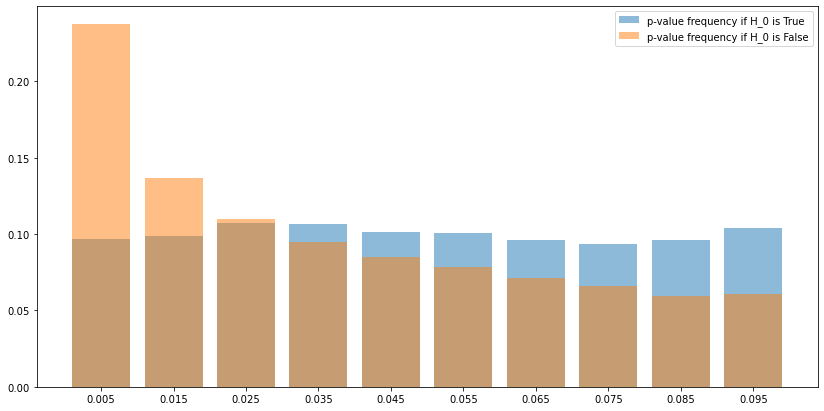

In [7]:
hist_true, bins = np.histogram(result_df[result_df["real"] == True]["p-value"],
                               bins=np.linspace(0,0.1,11))
hist_false, bins = np.histogram(result_df[result_df["real"] == False]["p-value"],
                               bins=np.linspace(0,0.1,11))

plt.figure(figsize=(14, 7))
plt.bar((bins[1:]+bins[:-1])/2, hist_true/np.sum(hist_true),
        width=0.008, alpha=.5, label="p-value frequency if H_0 is True")
plt.bar((bins[1:]+bins[:-1])/2, hist_false/np.sum(hist_false),
        width=0.008, alpha=.5, label="p-value frequency if H_0 is False")
plt.legend()
plt.xticks((bins[1:]+bins[:-1])/2)
None

In [11]:
print(f"Among the times in which the null hypothesis was rejected the\n"
      f"null hypothesis was actually correct in "
      f"{round(result_df[~result_df['reported']].mean()['real']*100)}%"
      " of the cases.")

Among the times in which the null hypothesis was rejected the
null hypothesis was actually correct in 16% of the cases.


In [12]:
print(f"Among the times in which a p-value between 0.04 and 0.05 was reported the\n"
      f"null hypothesis was actually correct in "
      f"{round(result_df[(result_df['p-value']>0.04) & (result_df['p-value']<0.05)].mean()['real']*100)}%"
      " of the cases.")

Among the times in which a p-value between 0.04 and 0.05 was reported the
null hypothesis was actually correct in 23% of the cases.
